<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina')

In [2]:
df=pd.read_csv('Bank_Customer_Churn_dataset (1).csv')

In [3]:
df

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [6]:
df.head(10)

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   
5          645     Spain    Male   44       8  113755.78              2   
6          822    France    Male   50       7       0.00              2   
7          376   Germany  Female   29       4  115046.74              4   
8          501    France    Male   44       4  142051.07              2   
9          684    France    Male   27       2  134603.88              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0  
5          1               0        149756.71       1  
6          1               1         10062.80       0  
7          1               0        119346.88       1  
8          0               1         74940.50       0  
9          1               1         71725.73       0

In [7]:
df.shape

(10000, 11)

In [8]:
df.describe()

CreditScore           Age        Tenure        Balance  NumOfProducts  \
count  10000.000000  10000.000000  10000.000000   10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288       1.530200   
std       96.653299     10.487806      2.892174   62397.405202       0.581654   
min      350.000000     18.000000      0.000000       0.000000       1.000000   
25%      584.000000     32.000000      3.000000       0.000000       1.000000   
50%      652.000000     37.000000      5.000000   97198.540000       1.000000   
75%      718.000000     44.000000      7.000000  127644.240000       2.000000   
max      850.000000     92.000000     10.000000  250898.090000       4.000000   

         HasCrCard  IsActiveMember  EstimatedSalary        Exited  
count  10000.00000    10000.000000     10000.000000  10000.000000  
mean       0.70550        0.515100    100090.239881      0.203700  
std        0.45584        0.499797     57510.492818      0.402769  
min        0.00000        0.000000        11.580000      0.000000  
25%        0.00000        0.000000     51002.110000      0.000000  
50%        1.00000        1.000000    100193.915000      0.000000  
75%        1.00000        1.000000    149388.247500      0.000000  
max        1.00000        1.000000    199992.480000      1.000000

In [9]:
print(df['Tenure'].unique())
print(df['NumOfProducts'].unique())
print(df['Geography'].unique())

[ 2  1  8  7  4  6  3 10  5  9  0]
[1 3 2 4]
['France' 'Spain' 'Germany']


In [10]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
enc_df = pd.DataFrame(onehotencoder.fit_transform(df[['Geography']]).toarray())
df = df.join(enc_df)


df.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited    0    1    2  
0          1               1        101348.88       1  1.0  0.0  0.0  
1          0               1        112542.58       0  0.0  0.0  1.0  
2          1               0        113931.57       1  1.0  0.0  0.0  
3          0               0         93826.63       0  1.0  0.0  0.0  
4          1               1         79084.10       0  0.0  0.0  1.0

In [11]:
geo={ 'Gender':{'Female':0,'Male':1}}
df = df.replace(geo)

In [12]:
df.drop(['Geography',2],axis=1,inplace=True)

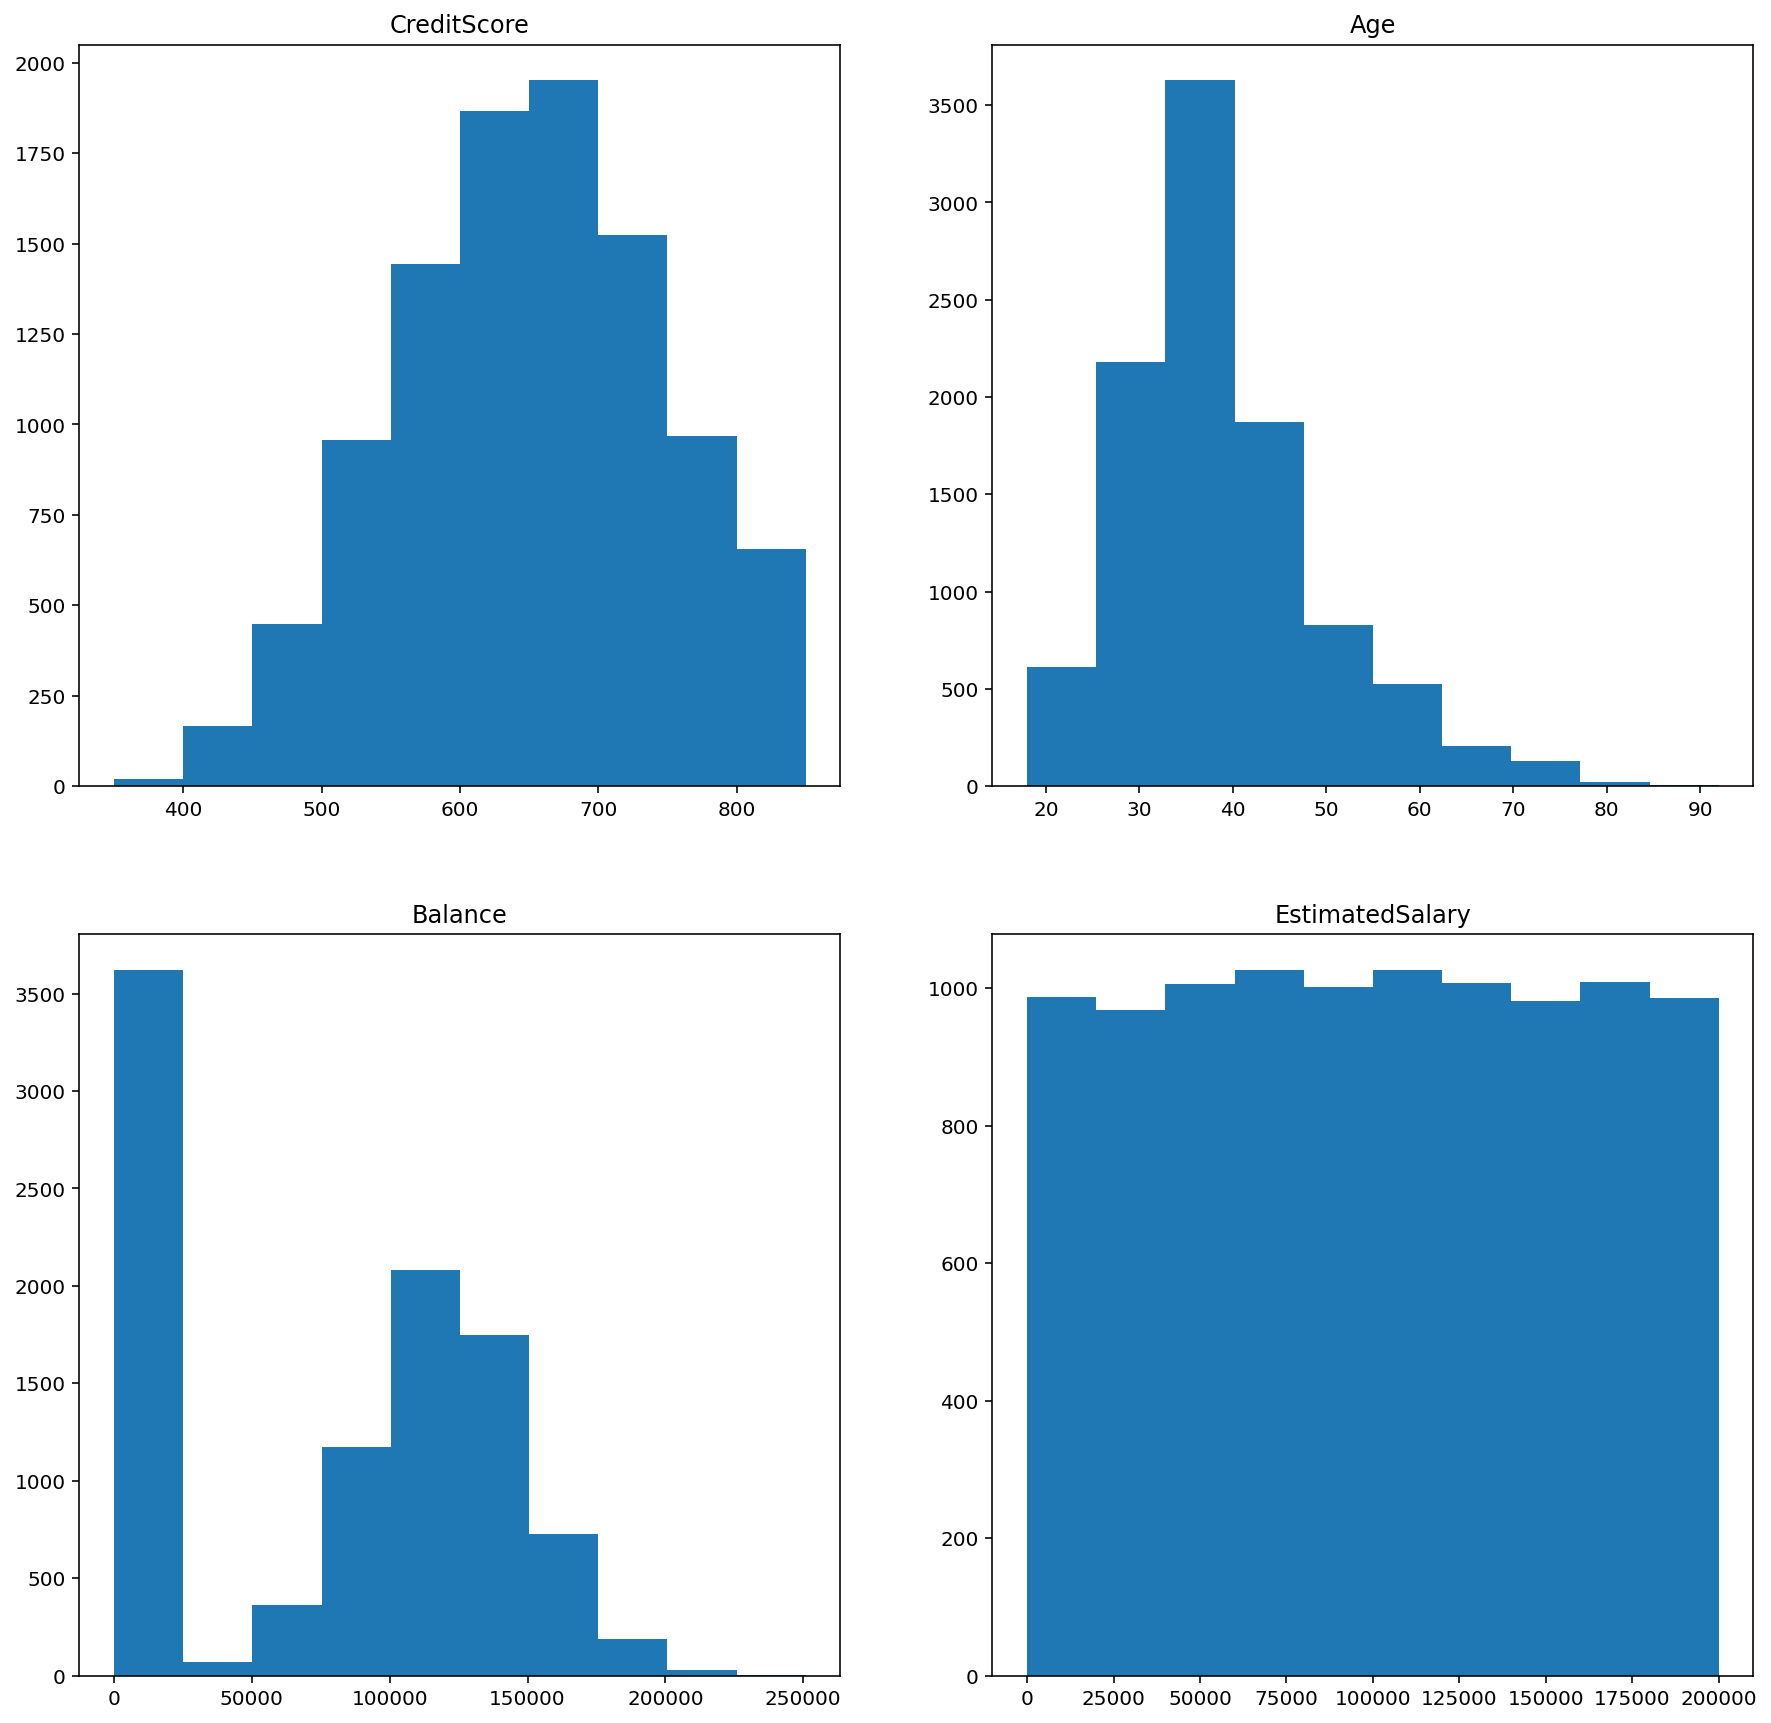

In [13]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.hist(df['CreditScore'])
plt.title('CreditScore')
plt.subplot(2,2,2)
plt.hist(df['Age'])
plt.title('Age')
plt.subplot(2,2,3)
plt.hist(df['Balance'])
plt.title('Balance')
plt.subplot(2,2,4)
plt.hist(df['EstimatedSalary'])
plt.title('EstimatedSalary')
plt.show()

(array([ 142.,  315., 1184., 2038., 2740., 1871.,  980.,  501.,  210.,
          19.]),
 array([2.89037176, 3.05351344, 3.21665512, 3.3797968 , 3.54293849,
        3.70608017, 3.86922185, 4.03236353, 4.19550521, 4.3586469 ,
        4.52178858]),
 <a list of 10 Patch objects>)

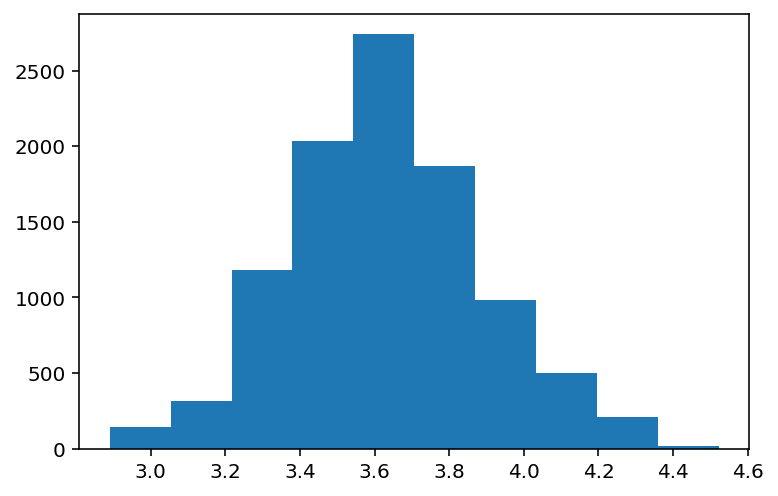

In [14]:
df['Age']=np.log(df['Age'])
plt.hist(df['Age'])

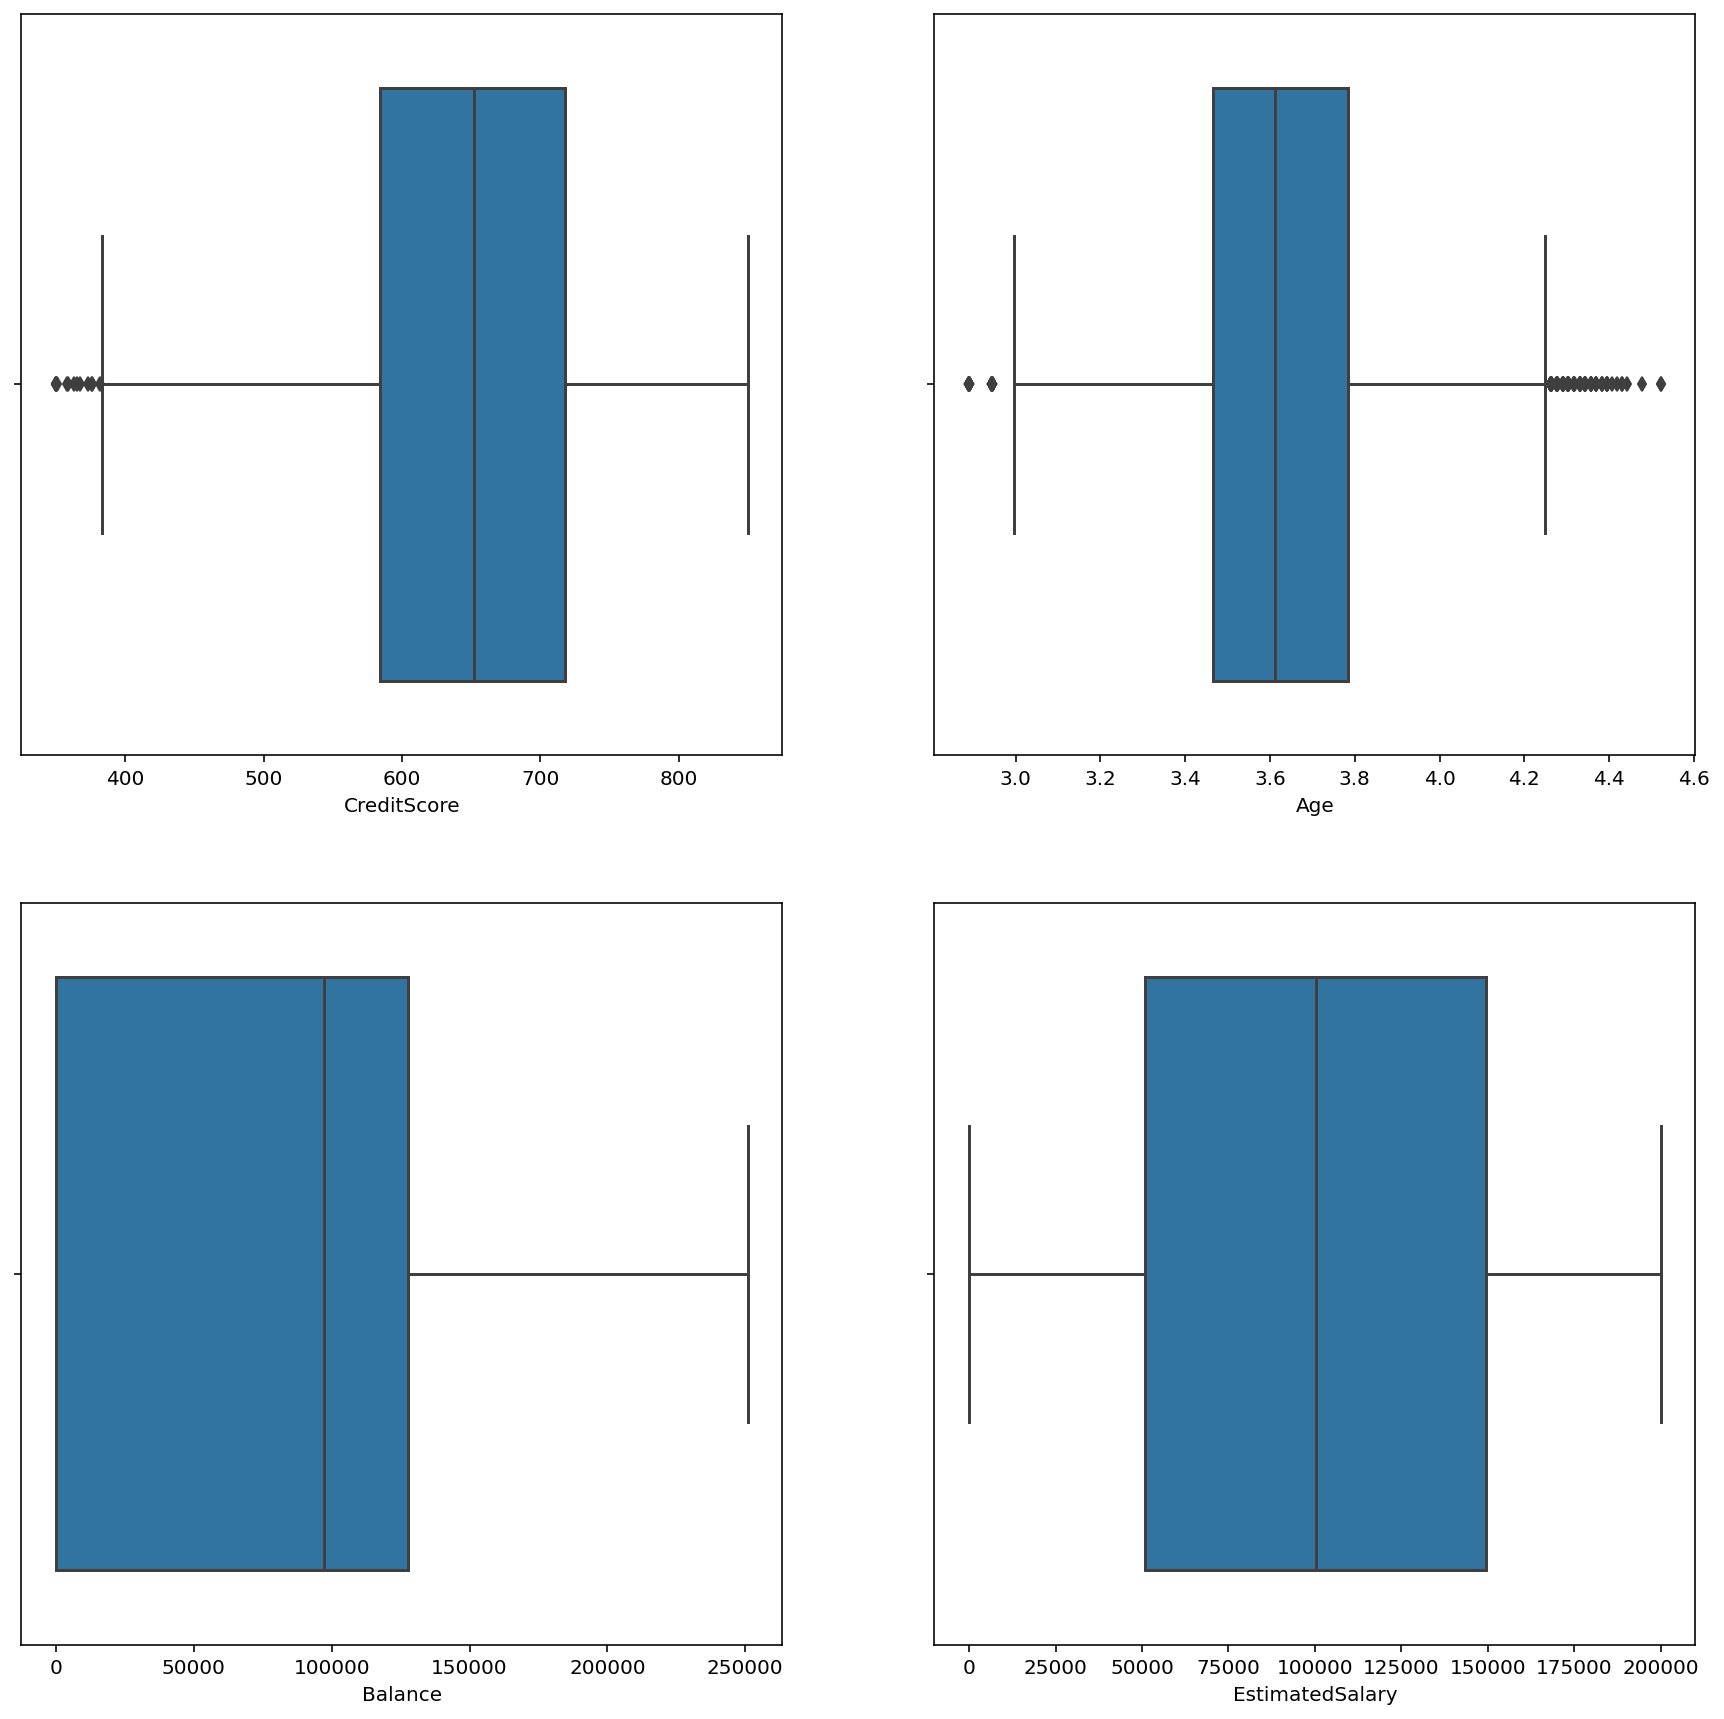

In [15]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
sns.boxplot(x=df["CreditScore"])
plt.subplot(2,2,2)
sns.boxplot(x=df["Age"])
plt.subplot(2,2,3)
sns.boxplot(x=df['Balance'])
plt.subplot(2,2,4)
sns.boxplot(x=df['EstimatedSalary'])
plt.show()

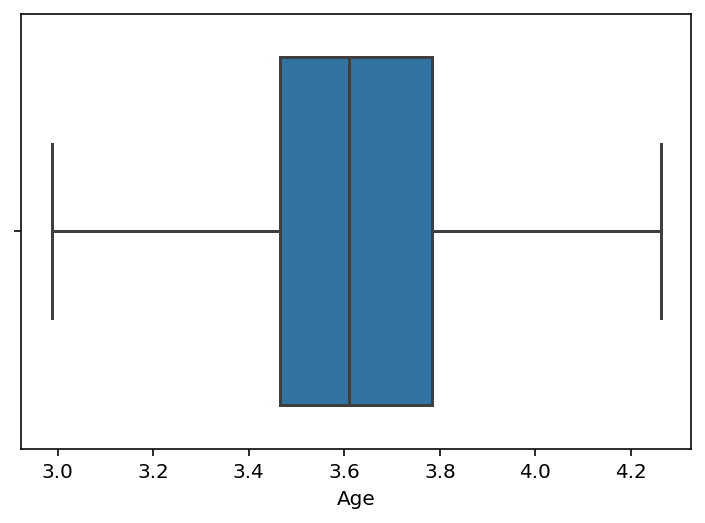

In [16]:
Q1=df['Age'].quantile(0.25)
Q3=df['Age'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
df['Age'] = np.where(df['Age']> Upper_Whisker,Upper_Whisker,df['Age'])
df['Age'] = np.where(df['Age']< Lower_Whisker,Lower_Whisker,df['Age'])
sns.boxplot(x=df["Age"])
plt.show()

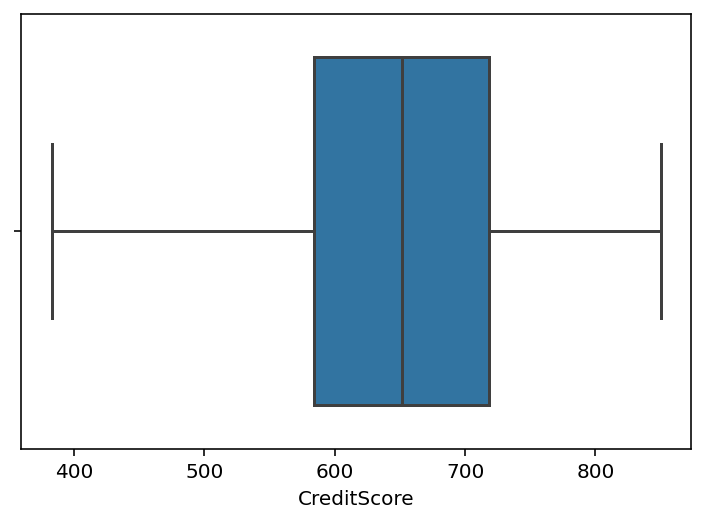

In [17]:
Q1=df['CreditScore'].quantile(0.25)
Q3=df['CreditScore'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
df['CreditScore'] = np.where(df['CreditScore']> Upper_Whisker,Upper_Whisker,df['CreditScore'])
df['CreditScore'] = np.where(df['CreditScore']< Lower_Whisker,Lower_Whisker,df['CreditScore'])
sns.boxplot(x=df["CreditScore"])
plt.show()

In [18]:
import sklearn
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df['EstimatedSalary'] = scaler.fit_transform(df[['EstimatedSalary']])
df['Balance']=scaler.fit_transform(df[['Balance']])

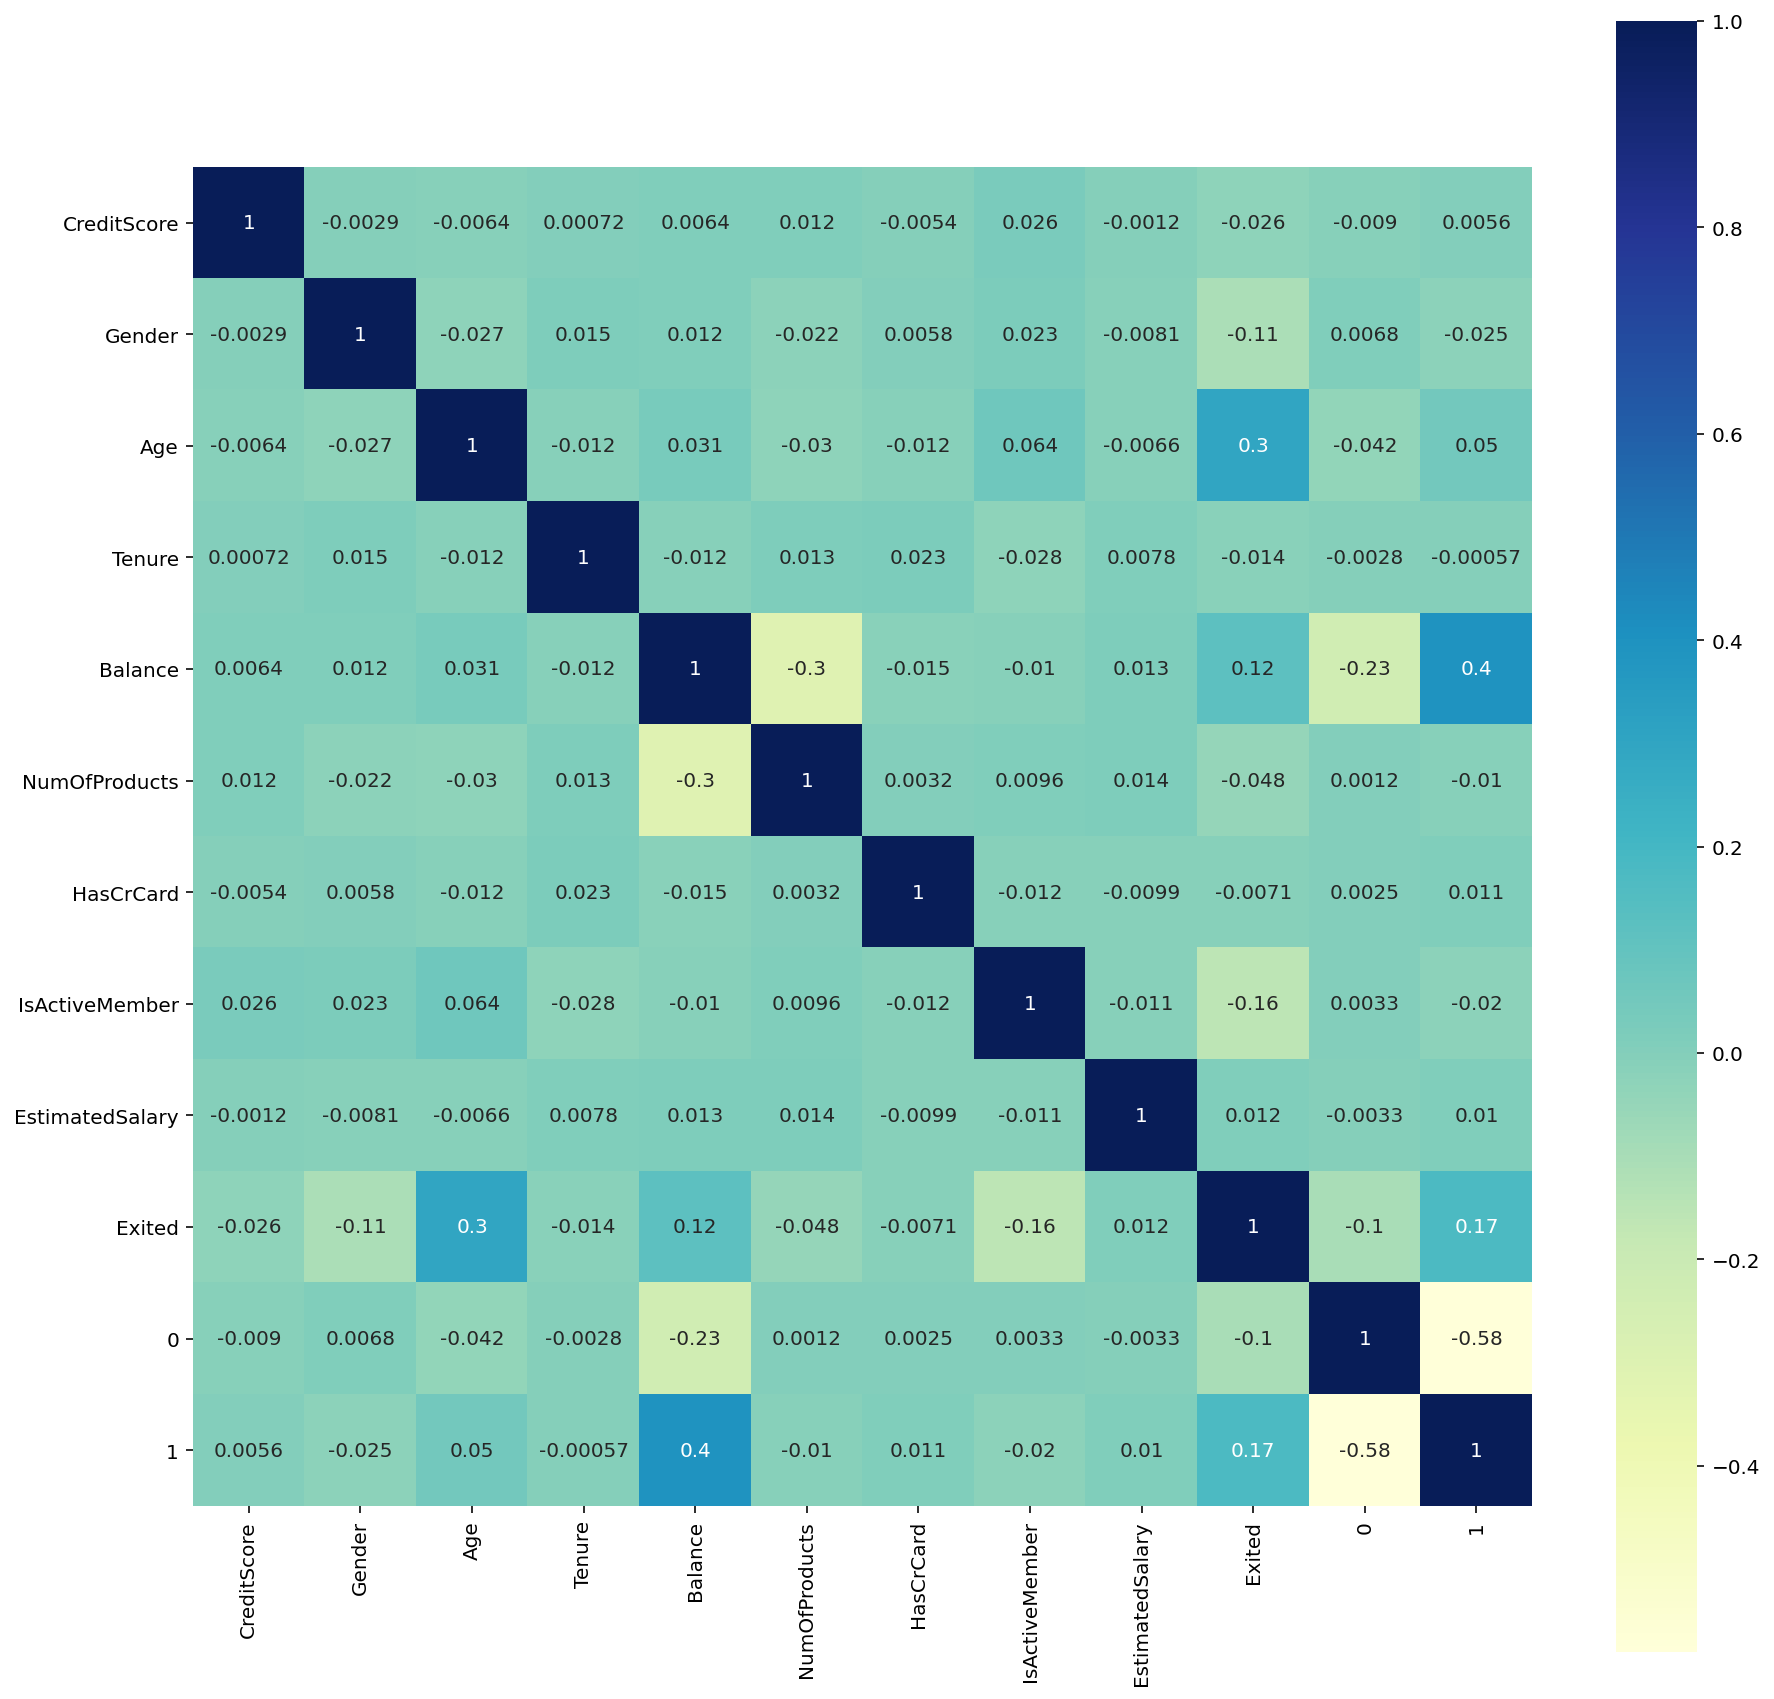

In [19]:
correlation=df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation,annot=True,square=True,cmap="YlGnBu")


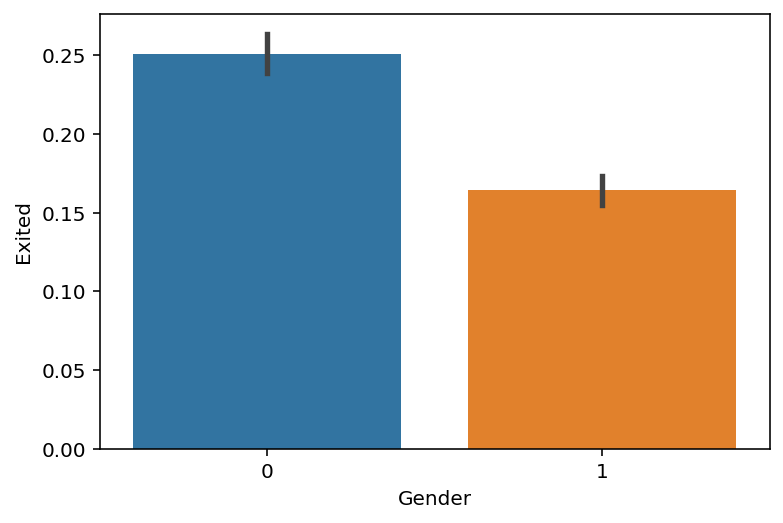

In [20]:
sns.barplot(x='Gender',y='Exited',data=df)

In [21]:
df.drop(['Tenure','HasCrCard'],axis=1,inplace=True)

In [22]:
df.drop(['EstimatedSalary'],axis=1,inplace=True)

In [23]:
df

CreditScore  Gender       Age   Balance  NumOfProducts  IsActiveMember  \
0           619.0       0  3.737670 -1.225848              1               1   
1           608.0       0  3.713572  0.117350              1               1   
2           502.0       0  3.737670  1.333053              3               0   
3           699.0       0  3.663562 -1.225848              2               0   
4           850.0       0  3.761200  0.785728              1               1   
...           ...     ...       ...       ...            ...             ...   
9995        771.0       1  3.663562 -1.225848              2               0   
9996        516.0       1  3.555348 -0.306379              1               1   
9997        709.0       0  3.583519 -1.225848              1               1   
9998        772.0       1  3.737670 -0.022608              2               0   
9999        792.0       0  3.332205  0.859965              1               0   

      Exited    0    1  
0          1  1.0  0.0  
1          0  0.0  0.0  
2          1  1.0  0.0  
3          0  1.0  0.0  
4          0  0.0  0.0  
...      ...  ...  ...  
9995       0  1.0  0.0  
9996       0  1.0  0.0  
9997       1  1.0  0.0  
9998       1  0.0  1.0  
9999       0  1.0  0.0  

[10000 rows x 9 columns]

In [24]:
df['Age']=scaler.fit_transform(df[['Age']])

In [25]:

from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split

In [26]:
X=df.iloc[:,:-2]
y=df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [27]:
result={}
models={}
models['LOR']=LogisticRegression(solver='liblinear',C=0.004)
models['KNN']=KNeighborsClassifier(n_neighbors=3)

In [28]:
for key in models:
    kfold = StratifiedKFold(n_splits=10,shuffle=True)
    cv_results = cross_val_score(models[key], X_train, y_train, cv=kfold, scoring='accuracy')
    result[key]=cv_results.mean()

In [29]:
print("Model and Accuracy:-")
chosen_one = max(result, key=result.get)     
result

Model and Accuracy:-


{'LOR': 0.9381666666666666, 'KNN': 0.8858333333333333}

In [30]:
import pickle

In [31]:
with open("chosen_model.pickle",'wb') as f:
    pickle.dump(models[chosen_one],f)

In [32]:
pickle_in = open("chosen_model.pickle", "rb")
final_model = pickle.load(pickle_in)

In [33]:
final_model.fit(X_train,y_train)
predictions = final_model.predict(X_test)

In [34]:
print('model_name : ',str(models[chosen_one]))
print('Accuracy : '+str(accuracy_score(y_test,predictions)))

model_name :  LogisticRegression(C=0.004, solver='liblinear')
Accuracy : 0.9455
